In [2]:
import sys
sys.path.append('/home/yzy/bioSIMS/code/analysis')
from utils import *
sys.path.append('/home/yzy/software/FIt-SNE')
from fast_tsne import fast_tsne
from SIMS_cluster2 import *
from SIMS_diff import *
from importlib import reload
import kneed
import sys
import scanpy as sc
sys.path
sys.path.append('/home/yzy/software2/FINCH-Clustering/python/')
print(sys.path)
from finch import FINCH
from pyemd import *
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
sys.path.append('/home/yzy/software/gini')
from gini import *
def show_images(images, cols = 1, titles = None,cmps='jet'):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
#         print(cols)
#         cmp = cmps[n]
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
        
    
        plt.imshow(image,cmap=cmps)
        plt.xticks([])
        plt.yticks([])
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
# from home.bioSIMS.code.analysis.utils import *
# from bioSIMS.code.analysis.utils import *

Using TensorFlow backend.


['/data01/software/MATLAB/extern/engines/python/dist/matlab/engine/glnxa64', '', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages', '/home/yzy/anaconda3/envs/tensorflow/lib/python36.zip', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/lib-dynload', '/home/yzy/.local/lib/python3.6/site-packages', '/home/yzy/.local/lib/python3.6/site-packages/scprep-0.11.0-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/Sphinx-1.5.6-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/spherecluster-0.1.5-py3.6.egg', '/home/yzy/software/xy_python_utils', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/Sphinx-1.2.3-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/extensions', '/home/yzy/.ipython', '/home/yzy/bioSIMS/code/analysis', '/hom

/home/yzy/software2/FINCH-Clustering/python/finch.py:13: UserWarning: pyflann not installed: No module named 'index'
  warnings.warn('pyflann not installed: {}'.format(e))


In [3]:
data_mat_filename_temp = '/home/yzy/bioSIMS/data/process/{0}/cut/rst/datamat.mat'
matter_list_filename_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/matters_candidate.pkl'

# data = 'SPE1'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_718.mat'

# data='20190115_liverfiber1_filter'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_198.mat'
# data='liver_hoechst_blood_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_114.mat'
# data = '20190303_liverfiber_fix'
# data = '20190308_liver_P1LF2_2'

# data = 'P3_low_1_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_621.mat'
# data = 'P3_high_2_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_238.mat'

# data='liver-xwh-2-1'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_286.mat'

# data='SPE1'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_286.mat'

# data='20190103_lung3_filter'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_164.mat'

# data='20190117_liverfiber2_pos'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_209.mat'


# data='P4_low0_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_793.mat'


# data='20190117_liverfiber2_pos'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_209.mat'

# data='rat0_low0_auto'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_699.mat'


# data='20190117_liverfiber2_pos_gaussian_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_209.mat'

# data = 'P5LC_POS1_HIGH0_None_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_196.mat'

# data='mouse0_liver0_neg0_high0_div15_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_224.mat'

# data='mouse0_lung0_neg0_high0_div10_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_225.mat'


# data='mouse0_lung0_pos0_high0_div10_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_193.mat'


# data='mouse0_liver0_neg1_high0_5_None_ada'
# data='mouse0_liver0_neg1_high0_None_ada'
# # # # data='mouse0_liver0_neg1_high0_5_None_auto'
# data='mouse0_liver0_neg1_high0_div15_gaussian_ada'
# data='mouse0_liver0_neg1_high0_div15_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_244.mat'

# data = 'mouse0_liver0_neg2_high0_None_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_244.mat'


# data='mouse0_kidney0_neg0_high0_20_None_auto'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_221.mat'

# data='mouse0_liver0_pos1_high1_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_200.mat'

data='mouse0_liver0_neg1_low0_div10_None_ada'
test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_691.mat'



matter_list_filename = matter_list_filename_temp.format(data)
data_mat_filename = data_mat_filename_temp.format(data)
test_sample_filename = test_sample_temp.format(data)
test_sample_all = sio.loadmat(test_sample_filename)['test_samples']
mode='none'
norm='none'
[original_data,cell_related_data]=get_train_data(data_mat_filename,mode,norm,batch_num_list=[1])
train_x=cell_related_data['train_x']
cell_idx=cell_related_data['cell_idx']
cell_pos=cell_related_data['cell_pos']
num_cells = np.max(cell_idx)
num_cells = int(num_cells)
matter_list = pickle.load(open(matter_list_filename,'rb'))
matter_list = np.array(matter_list)

In [3]:
def get_img(matter,test_sample_all=test_sample_all,matter_list=matter_list,mode='None'):
    if mode=='median':
        test_sample_all = (test_sample_all+1)/(np.percentile(test_sample_all,50,axis=1,keepdims=True)+1)
    elif mode=='total':
        test_sample_all = (test_sample_all)/np.sum(test_sample_all,axis=1,keepdims=True)
    else:
        pass
        
    return test_sample_all[:,matter_list==matter].reshape(256,256)

In [4]:
img = get_img(101.03)

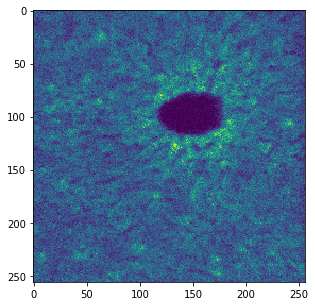

In [5]:
# %matplotlib notebook
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [19]:
img_87=get_img(87)
img_101=get_img(101.03)
img_59=get_img(59.01)

# 从test_sample_all得到四元素

In [225]:
256/8

32.0

In [4]:
# input：
# test_sample_all
# grid_sz

# return：四元素
# train_x
# cell_idx  从1开始
# cell_pos  从1开始
# num_cells
# 按照划分grid的顺序来排

# 思路：
# step 1:先按照pixel的顺序，给每个pixel标记cell_idx,cell_pos,train_x
# step 2:按照cell_idx排序。用argsort的顺序来重排cell_pos和train_x

test_sample_all = test_sample_all
grid_sz = 8

grid_num = int(256/grid_sz)

# 初始化四元素
train_x = test_sample_all
cell_idx = np.zeros(shape=(65536,))
cell_pos = np.zeros(shape=(65536,))
num_cells = 0

# start【set cell_idx and cell_pos】

for i in range(65536):
    cur_pos = i+1
    cur_i = ind2ij(cur_pos,size=256,axis=0)
    cur_j = ind2ij(cur_pos,size=256,axis=1)
    
    cur_grid_i = np.floor((cur_i-1)/grid_sz)
    cur_grid_j = np.floor((cur_j-1)/grid_sz)
#     从0开始

    grid_idx = grid_num*cur_grid_i+cur_grid_j
#     从0开始

    cur_cell = grid_idx+1
    
    cell_idx[i] = cur_cell
    cell_pos[i] = cur_pos
# end【set cell_idx and cell_pos】

cell_idx_old = cell_idx.copy()


cell_idx_argsort = np.argsort(cell_idx)
cell_idx = cell_idx[cell_idx_argsort]
cell_pos = cell_pos[cell_idx_argsort]
train_x = train_x[cell_idx_argsort,:]
num_cells = cell_idx.max()

 

    
    
    
    
    

In [121]:
cell_pos[64]

1806.0

In [8]:
matter_profile = np.transpose(test_sample_all)
matter_umap_embed = umap.UMAP(metric='correlation').fit_transform(matter_profile)
matter_umap_y = hdbscan.HDBSCAN().fit_predict(matter_umap_embed)
plt.figure(figsize=(5,5))
sns.scatterplot(x=matter_umap_embed[:,0],y=matter_umap_embed[:,1],hue=matter_umap_y,s=10,palette=sns.hls_palette(np.unique(matter_umap_y).shape[0]))



In [248]:
matter_list[matter_umap_y==0]

array([ 51.97,  53.97,  55.97,  58.97,  59.96,  60.97,  61.96,  61.97,
        67.96,  75.96,  76.96,  77.96,  87.91,  91.94,  98.94,  99.94,
       100.96, 115.93, 116.94, 117.94, 118.94, 119.92, 131.91, 132.91,
       135.92, 136.92, 137.92, 147.87, 159.92, 162.9 , 175.9 , 176.91,
       177.89, 178.89, 179.89, 191.88, 192.88, 195.88, 196.88, 201.88,
       217.87, 218.87, 219.87, 231.83, 234.83, 235.85, 236.87, 237.86,
       238.88, 251.83, 252.85, 255.84, 256.85, 258.85, 259.85, 274.84,
       275.83, 277.83, 278.84, 279.83, 293.81, 294.8 , 295.81, 296.81,
       297.82, 298.82, 311.79, 312.79, 318.81, 319.82, 320.82, 334.79,
       335.79, 336.81, 337.8 , 338.79, 339.79, 350.73, 351.79, 352.78,
       353.77, 354.76, 355.78, 356.78, 357.78, 358.78, 359.78, 371.77,
       372.76, 373.77, 374.76, 375.75, 376.77, 379.77, 394.75, 395.75,
       397.76, 398.75, 399.75, 411.73, 413.74, 414.73, 415.73, 416.74,
       419.75, 435.72, 436.71, 437.73, 438.73, 439.72, 452.7 , 453.71,
      

In [12]:
# 可以选定某个物质集，来画flux。如只关心核内物质代谢流，87系列代谢流等
# 默认matter_interest = matter_list.copy()
matter_interest = matter_list.copy()
# matter_interest=[
# #     87系列
#     59.01,69,73,87,101.03,221.08
# ]
matter_interest=np.array(matter_interest)
# matter_interest = matter_list[matter_umap_y==0]

matter_interest_index = [np.where(matter_list==m)[0][0] for m in matter_interest]

In [13]:
# 每一个grid内取平均，拿到一个num_grid*671的矩阵

mean_profile_list=[]

for i in range(int(num_cells)):
    mean_profile_list.append(np.mean(train_x[cell_idx==i+1,:],axis=0))
mean_profile_list = np.array(mean_profile_list)
mean_profile_list = mean_profile_list[:,matter_interest_index]


In [18]:
cell_idx.max()

1024.0

In [19]:
import utils
reload(utils)
from utils import *

SIMS_id_t_list = [5,10,15,20,25,30,35,40,50]
num_cells=int(num_cells)
# liverfiberfix
# HEG_list = [115.35,117.32,122.34,131.34,147.35,152.38,168.39,170.41]

# liverfiber1
# HEG_list = [115,116.96,121.98,130.98,146.96,151.99,167.99,170.01]
# HEG_list = [115,121.98,130.98,167.99,170.01]

# SPE1
# HEG_list = [89.92,91.93,107.92,114.91,121.93,122.90,123.91,128.93,129.93,130.91,132.90,139.90,146.91]

# PL_list = [134,143.92,148.95,158.90]
# HEG_list.extend(PL_list)

# P5_pos_high 
# HEG_list= [61.32,85.4,97.43]

HEG_list = matter_list
# HEG_list = matter_list[FF_sort[-70:]]
# HEG_list=matter_list[sort_y[-3:]]
# HEG_list=matter_list[sort_y[kneedle.elbow:]]
# HEG_list = filtered_matter
# HEG_list = matter_list[np.argsort(gini_list)][-10:-1]
# matter_list[sort_y[kneedle.elbow:]]
# HEG_list = matter_list[sort_y[kneedle.elbow:]]
# random_idx = np.random.permutation(matter_list.shape[0])[0:10]
# random_idx=[]
HEG_col_idx = [list(matter_list).index(HEG) for HEG in HEG_list]
# HEG_col_idx.extend(random_idx)
# train_x_preprocess = Normalizer(norm='l1').fit_transform(train_x)
# netwidths=[128,128,128]
netwidths=[128,128,128]

error_threshold=0
train_x_HEG = train_x[:,HEG_col_idx]
# train_x_preprocess = train_x_HEG
# train_x_preprocess = (train_x_HEG+1)/(train_x_HEG[:,matter_list==133.92]+1)

train_x_preprocess = (train_x_HEG)/np.sum(train_x_HEG,axis=1,keepdims=True)
# train_x_preprocess = (train_x_HEG+1)/(np.percentile(train_x_HEG,50,axis=1,keepdims=True)+1)




# train_x_preprocess = MinMaxScaler().fit_transform(train_x_preprocess)
# train_x_preprocess = np.log(train_x_preprocess+1)

# train_x_preprocess = train_x_preprocess-train_x_preprocess.mean(axis=0)
# U, s, V = np.linalg.svd(train_x_preprocess, full_matrices=False)
# train_x_preprocess = np.dot(U, np.diag(s))[:,:50]

# noise_matrix = np.random.rand(train_x_preprocess.shape[0],train_x_preprocess.shape[1])
# noise_matrix = np.ones_like(train_x_preprocess)
# train_x_preprocess = np.hstack([train_x_preprocess,noise_matrix])


rep_list = get_distil_rep(train_x_preprocess,cell_idx,num_cells,SIMS_id_t_list, verbose=False,epochs=300,netwidths=netwidths,low_dim=netwidths[2],error_threshold=error_threshold)


Epoch 1/300
65536/65536 [==============================] - 21s 317us/step - loss: 6.6498 - softmax_loss: 6.6498 - center_loss: 11.2527
Epoch 2/300
65536/65536 [==============================] - 6s 84us/step - loss: 6.1194 - softmax_loss: 6.1194 - center_loss: 44.6984
Epoch 3/300
65536/65536 [==============================] - 6s 85us/step - loss: 5.8880 - softmax_loss: 5.8880 - center_loss: 80.1524
Epoch 4/300
65536/65536 [==============================] - 5s 83us/step - loss: 5.8102 - softmax_loss: 5.8102 - center_loss: 86.6543
Epoch 5/300
65536/65536 [==============================] - 5s 81us/step - loss: 5.7584 - softmax_loss: 5.7584 - center_loss: 86.6243
Epoch 6/300
65536/65536 [==============================] - 6s 85us/step - loss: 5.6990 - softmax_loss: 5.6990 - center_loss: 85.1811
Epoch 7/300
65536/65536 [==============================] - 6s 84us/step - loss: 5.6512 - softmax_loss: 5.6512 - center_loss: 84.8298
Epoch 8/300
65536/65536 [==============================] - 5s 83us/

65536/65536 [==============================] - 6s 86us/step - loss: 3.9021 - softmax_loss: 3.9021 - center_loss: 55.6216
Epoch 123/300
65536/65536 [==============================] - 5s 84us/step - loss: 3.8975 - softmax_loss: 3.8975 - center_loss: 55.4970
Epoch 124/300
65536/65536 [==============================] - 5s 83us/step - loss: 3.8907 - softmax_loss: 3.8907 - center_loss: 55.7147
Epoch 125/300
65536/65536 [==============================] - 5s 83us/step - loss: 3.8880 - softmax_loss: 3.8880 - center_loss: 55.3917
Epoch 126/300
65536/65536 [==============================] - 5s 83us/step - loss: 3.8807 - softmax_loss: 3.8807 - center_loss: 55.4966
Epoch 127/300
65536/65536 [==============================] - 6s 90us/step - loss: 3.8765 - softmax_loss: 3.8765 - center_loss: 55.6603
Epoch 128/300
65536/65536 [==============================] - 6s 86us/step - loss: 3.8693 - softmax_loss: 3.8693 - center_loss: 55.4026
Epoch 129/300
65536/65536 [==============================] - 6s 85us/

65536/65536 [==============================] - 6s 92us/step - loss: 3.3737 - softmax_loss: 3.3737 - center_loss: 61.1678
Epoch 243/300
65536/65536 [==============================] - 6s 93us/step - loss: 3.3728 - softmax_loss: 3.3728 - center_loss: 61.2936
Epoch 244/300
65536/65536 [==============================] - 6s 92us/step - loss: 3.3667 - softmax_loss: 3.3667 - center_loss: 61.2210
Epoch 245/300
65536/65536 [==============================] - 6s 90us/step - loss: 3.3599 - softmax_loss: 3.3599 - center_loss: 61.4425
Epoch 246/300
65536/65536 [==============================] - 6s 93us/step - loss: 3.3579 - softmax_loss: 3.3579 - center_loss: 61.5405
Epoch 247/300
65536/65536 [==============================] - 6s 92us/step - loss: 3.3556 - softmax_loss: 3.3556 - center_loss: 61.6380
Epoch 248/300
65536/65536 [==============================] - 6s 91us/step - loss: 3.3533 - softmax_loss: 3.3533 - center_loss: 61.8992
Epoch 249/300
65536/65536 [==============================] - 6s 91us/

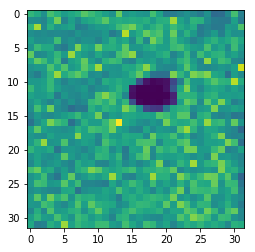

In [20]:
plt.figure()
plt.imshow(mean_profile_list[:,170].reshape(grid_num,grid_num))
plt.show()

In [202]:
mean_filter_train_x = np.zeros_like(train_x)
for i in range(65536):
    cur_grid_idx = cell_idx[i]
    mean_filter_train_x[i,:] = mean_profile_list[int(cur_grid_idx-1),:]

In [10]:
input_dist.shape

(1024, 1024)

In [ ]:
# rep = rep_list[0]
# rep = rep_list[0]
# from sklearn.manifold import tsne
# #PCA预处理
# rep_preprocess = np.log(rep+1)
# rep_preprocess = rep_preprocess-rep_preprocess.mean(axis=0)
# U, s, V = np.linalg.svd(rep_preprocess, full_matrices=False)
# rep_preprocess = np.dot(U, np.diag(s))[:,:50]
#PCA预处理
# rep_preprocess = rep

# rep_preprocess = rep_list[0][:,0][:,None]

# rep_embed = umap.UMAP(n_neighbors=30,min_dist=0).fit_transform(rep_preprocess)
# rep_embed = fast_tsne(rep_preprocess,perplexity=20)

# input_sim = sim_mat_order
# input_dist = 1/(1+input_sim)

# input_dist = (sim_mat+np.transpose(sim_mat))/2
# input_dist = squareform(pdist(rep_list[4]))
# input_dist = input_sim_mat
# input_rep = mean_profile_list
input_rep = rep_list[0]
# input_rep = mean_profile_list_median

input_dist = squareform(pdist(input_rep,'cosine'))
# input_dist = 1-LWCM_np
# input_dist = dist_mat[list(matter_list).index(114.91),:,:]
# input_dist = test_mat
# input_dist = 1-A
# input_dist = sim_mat_median_sym
# input_dist = squareform(pdist(mean_profile_list_median))
# rep_embed = umap.UMAP(metric='precomputed',n_neighbors=10,n_components=2).fit_transform(input_dist)
rep_embed = umap.UMAP(n_neighbors=10,n_components=2).fit_transform(input_rep)


# rep_embed = phate.PHATE(knn=10, decay=100,knn_dist='precomputed').fit_transform(input_dist)
# rep_embed = TSNE(metric='precomputed').fit_transform(input_dist)
pred_y = hdbscan.HDBSCAN(min_cluster_size=5,min_samples=5).fit_predict(rep_embed)
# pred_y = KMeans(4).fit_predict(input_dist)
# pred_y = RMKKM(input_rep,4.0)
# [pred_y,A] = SLKE(rep_embed,2)
# [pred_y,A] = SSR(rep_embed,2)
# pred_y[mark_list]=np.max(pred_y)+1

# pred_y = SIMLR(input_rep,-8)
# pred_y = c[:,2]
# pred_y = label_list[0]

# pred_y = KMeans(4).fit_predict(rep_list[3])
cluster_cmp = sns.hls_palette(np.unique(pred_y).shape[0])
labeling_plot_cmp = ['k']
labeling_plot_cmp.extend(cluster_cmp)
# mean_profile_list_median_preprocess = mean_profile_list_median-mean_profile_list_median.mean(axis=0)
# U, s, V = np.linalg.svd(mean_profile_list_median_preprocess, full_matrices=False)
# mean_profile_list_median_preprocess = np.dot(U, np.diag(s))[:,:50]
# umap_median_mean = umap.UMAP().fit_transform(mean_profile_list_median_preprocess)
# umap_median_mean = fast_tsne(mean_profile_list_median_preprocess,perplexity=50)
# fast_tsne(X50, perplexity=50, seed=42)

# X = X - X.mean(axis=0)
# U, s, V = np.linalg.svd(X, full_matrices=False)
# X50 = np.dot(U, np.diag(s))[:,:50]
# umap_median_mean = 
scatter_pd_data = {
    'x':[],
    'y':[],
    'i':[],
    
}
for i in range(int(num_cells)):
    cur_x = rep_embed[i,0]
    cur_y = rep_embed[i,1]
    cur_idx = i
    scatter_pd_data['x'].append(cur_x)
    scatter_pd_data['y'].append(cur_y)
    scatter_pd_data['i'].append(cur_idx)
    for matter in matter_interest:
        cur_profile = mean_profile_list[i,matter_interest==matter][0]
#         print(cur_profile)
        if not scatter_pd_data.get(matter):
            scatter_pd_data[matter]=[cur_profile]
        else:
            scatter_pd_data[matter].append(cur_profile)

scatter_pd = pd.DataFrame(scatter_pd_data)
            
scatter_pd['mark'] = pd.Series(np.zeros(shape=(scatter_pd.shape[0])),index=scatter_pd.index)

# fix
# mark_list = [391,403,376,397,357,367]

# liverfiber1
# mark_list = [404,443,428,430,448,449,450,463,464]

# liverfiber1
# mark_list = [404,443,428,448,449,463]
# mark_list = [404,443,428,448,449,463]

# SPE1
# mark_list = [140,146]


# lung
mark_list=[155,138,145,156,139,131,136]


for ml in mark_list:
    scatter_pd.loc[scatter_pd.i==ml,['mark']]=1
         

In [271]:
matter_interest

[59.01, 69, 73, 87, 101.03, 221.08]

In [270]:
matter_interest==matter

False

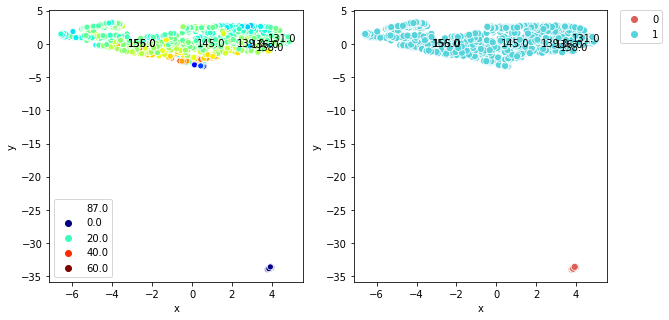

In [ ]:
from importlib import reload
# reload(plt)
# %matplotlib notebook
# pred_y-=pred_y.min()
# pred_y[cell_area_list>=40]=-1
cluster_cmp = sns.hls_palette(np.unique(pred_y).shape[0])
labeling_plot_cmp = ['k']
labeling_plot_cmp.extend(cluster_cmp)
# %matplotlib inline
# %matplotlib notebook

import matplotlib.pyplot as plt
# %matplotlib notebook

plt.figure(figsize=(10,5))
# sns.scatterplot(x='x',y='y',hue='mark',data=scatter_pd,size='mark',size_order=[1,0])

# sns.scatterplot(x='x',y='y',hue=pred_y,data=scatter_pd,size='mark',size_order=[1,0],palette=cluster_cmp)
plt.subplot(1,2,1)

sns.scatterplot(x='x',y='y',hue=87,data=scatter_pd,size_order=[1,0],palette='jet')
# sns.scatterplot(x='x',y='y',hue=pred_y,data=scatter_pd,size_order=[1,0],palette=cluster_cmp,s=50)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber_umap.pdf',transparent=True,format='pdf',bbox_inches='tight')

for i,row in scatter_pd.iterrows():
    
    cur_idx = row['i']
    if cur_idx not in mark_list:
        continue
    cur_x = row['x']
    cur_y = row['y']
    plt.annotate(str(cur_idx),(cur_x,cur_y))
# plt.colorbar(use_gridspec=True)




plt.subplot(1,2,2)

# sns.scatterplot(x='x',y='y',hue=87.36,data=scatter_pd,size_order=[1,0],palette='jet')
sns.scatterplot(x='x',y='y',hue=pred_y,data=scatter_pd,size_order=[1,0],palette=cluster_cmp,s=50)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber_umap.pdf',transparent=True,format='pdf',bbox_inches='tight')

for i,row in scatter_pd.iterrows():
    
    cur_idx = row['i']
    if cur_idx not in mark_list:
        continue
    cur_x = row['x']
    cur_y = row['y']
    plt.annotate(str(cur_idx),(cur_x,cur_y))
plt.show()

In [132]:
cluster_cmp

[(0.86, 0.3712, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86)]

In [304]:
labeling_plot_cmpg

NameError: name 'labeling_plot_cmpg' is not defined

In [308]:
np.u

[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

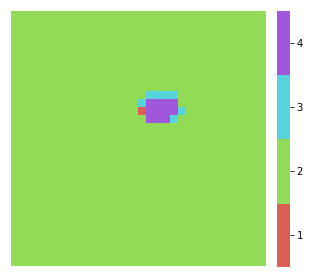

In [23]:
mode = 'grid'
# 这个时候选定的区域含括来65536个像素点，显示clusterimage里不应有黑色

# %matplotlib inline
import matplotlib.pyplot as plt
# uh_pred = hdbscan.HDBSCAN(min_cluster_size=30).fit_predict(rep_embed)
# pred_y = np.ones(shape=(np.max(cell_idx)))
# pred_y = KMeans(3).fit_predict(sim_mat_bak)
# pred_y = SIMLR(sim_mat_bak,-8)
# pred_y = SpectralClustering(4,affinity='precomputed').fit_predict(sim_mat_order_bak)
# pred_y = AgglomerativeClustering(4,affinity='precomputed',linkage='complete').fit_predict(1/(input_sim_mat+1))
to_labeling_pred_y = pred_y
# to_labeling_pred_y = resultsLWEA[:,2]
# to_labeling_pred_y = label_list_FF[2]
# to_labeling_pred_y = label_list[3]
# to_labeling_pred_y[mark_list]=2
if mode=='grid':
    cluster_cmp = sns.hls_palette(np.unique(to_labeling_pred_y).shape[0])
#     labeling_plot_cmp = ['k']

    labeling_plot_cmp = cluster_cmp.copy()
else:
    cluster_cmp = sns.hls_palette(np.unique(to_labeling_pred_y).shape[0])
    labeling_plot_cmp = ['k']
    labeling_plot_cmp.extend(cluster_cmp)
labeling = get_labeling(to_labeling_pred_y-np.min(to_labeling_pred_y),cell_idx,cell_pos)
# labeling[labeling==5]=0
img1 = labeling.reshape((256,256))
plt.figure(figsize=(5,5))
# plt.imshow(img1)
if mode=='grid':
    ticks=np.arange(np.min(img1)+1-1,np.max(img1)+1)
    boundaries = np.arange(np.min(img1)+0.5-1,np.max(img1)+1.5)
else:
    ticks=np.arange(np.min(img1)+1,np.max(img1)+1)
    boundaries = np.arange(np.min(img1)+0.5,np.max(img1)+1.5)
sns.heatmap(img1,cmap=labeling_plot_cmp,square=True,cbar_kws={"ticks":ticks, "boundaries":boundaries,'fraction':0.046,'pad':0.04})
# sns.heatmap(img1,cmap=labeling_plot_cmp,square=True,ad':0.04})

plt.xticks([])
plt.yticks([])
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber_cluster.pdf',transparent=True,format='pdf',bbox_inches='tight')

# for i in range(num_cells):
#     cur_idx = i + 1
#     cur_ind = cell_pos[cell_idx==cur_idx][0]
# #     print(ind2ij(cur_ind,256,0))
# #     print(ind2ij(cur_ind,256,1))
    
#     plt.annotate(str(cur_idx-1),(ind2ij(cur_ind,256,1),ind2ij(cur_ind,256,0)),color='red')

    
plt.show()

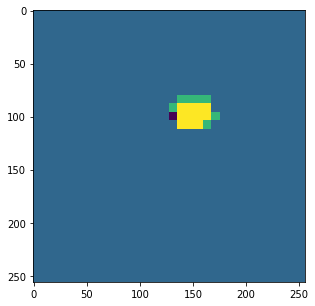

In [24]:
plt.figure(figsize=(5,5))
plt.imshow(img1)
plt.show()

# flux可视化函数

In [234]:
num_cells = int(num_cells)

In [ ]:
# step 1: 计算每个grid与其周边grid的梯度。是一个二维向量（需在单位圆上）。总体是一个num_grid*2的矩阵。
# step 2: 输入num_grid*2的矩阵，画出flux的image

In [29]:
# flux 版本1:向量相加版

# step 1
# 输入：
# rep_embed：二维embedding，num_grid*2
# 输出：
# flux_mat：每个grid的方向场，num_grid*2
flux_mat = np.zeros_like(rep_embed)
# 思路：循环每个grid，先找出它周围有哪些grid（序号），以该grid在特征空间为原点，计算周围grid的方向
for i in range(num_cells):
#     先找出周围的grid
    cur_grid_embed_cord = rep_embed[i,:]
    aroung_grid_embed_cord = np.zeros_like(cur_grid_embed_cord)
    grid_i = ind2ij(i+1,size=256/grid_sz,axis=0)-1
    grid_j = ind2ij(i+1,size=256/grid_sz,axis=1)-1
    
#     上行
    if i-256/grid_sz>=0:
#         说明上面有grid
        aroung_grid_embed_cord += rep_embed[int(i-256/grid_sz),:]
        if grid_j+1<=256/grid_sz-1:
            aroung_grid_embed_cord += rep_embed[int(i-256/grid_sz+1),:]
        if grid_j-1>=0:
            aroung_grid_embed_cord += rep_embed[int(i-256/grid_sz-1),:]
#     本行
    if grid_j+1<=256/grid_sz-1:
        aroung_grid_embed_cord += rep_embed[i+1,:]
    if grid_j-1>=0:
        aroung_grid_embed_cord += rep_embed[i-1,:]
        
#     下行
    if i+256/grid_sz<=256/grid_sz-1:
        aroung_grid_embed_cord += rep_embed[int(i+256/grid_sz),:]
        if grid_j+1<=256/grid_sz-1:
            aroung_grid_embed_cord += rep_embed[int(i+256/grid_sz+1),:]
        if grid_j-1>=0:
            aroung_grid_embed_cord += rep_embed[int(i+256/grid_sz-1),:]
    
#     aroung_grid_embed_cord准备就绪，需要减当前grid的坐标再单位化
    cur_flux = aroung_grid_embed_cord-cur_grid_embed_cord
    cur_flux/=np.linalg.norm(cur_flux, axis=-1)
    flux_mat[i,:] = cur_flux
    


In [53]:
a = np.zeros(shape=(2,))
a += 5*np.array([1,2])
a

array([ 5., 10.])

In [177]:
# flux版本2:先找root，再计算每个grid的SIMSID距离root的cor，STA的排序。每个grid指向它周围grid中，STA比仅他大的。用STA的差加权
# step 1
# 输入：
# flux_input_rep：k维embedding，num_grid*k，可以用SIMSID，也可以用其他的
# root_idx：int，为root grid的index
# 输出：
# flux_mat：每个grid的方向场，num_grid*2

flux_input_rep = rep_list[0]
root_idx=556


# 先计算STA:
STA_list = np.zeros(shape=(num_cells,))
for i in range(num_cells):
    cur_cor = pearsonr(flux_input_rep[i,:],flux_input_rep[root_idx,:])[0]
    STA_list[i] = cur_cor

# 上：[0,-1]
# 右上：[sqrt(2),-sqrt(2)]
# 右：[1,0]
# 右下：[sqrt(2),sqrt(2)]
#下：[0,1]
# 左下:[-sqrt(2),sqrt(2)]
# 左：[-1,0]
# 左上：[-sqrt(2),-sqrt(2)]
flux_mat = np.zeros_like(rep_embed)
# 思路：循环每个grid，先找出它周围有哪些grid（序号），检查这些grid是否是当前grid的祖先，如果是，则aroung_grid_embed_cord加上当前的方向乘以STA作为权重
for i in range(num_cells):
#     先找出周围的grid
#     cur_grid_embed_cord = rep_embed[i,:]
    cur_STA = STA_list[i]
    aroung_grid_embed_cord = np.zeros(shape=(2,))
    grid_i = ind2ij(i+1,size=256/grid_sz,axis=0)-1
    grid_j = ind2ij(i+1,size=256/grid_sz,axis=1)-1
    
#     上行
    if i==49:
        print(cur_STA)
    if i-256/grid_sz>=0:
#         说明上面有grid
        compare_STA = STA_list[int(i-256/grid_sz)]
        if i==49:
            print("上"+str(compare_STA))
        if compare_STA>cur_STA:
            aroung_grid_embed_cord+= (compare_STA-cur_STA)*np.array([-1,0])
            
            
#         aroung_grid_embed_cord += rep_embed[int(i-256/grid_sz),:]
        if grid_j+1<=256/grid_sz-1:
#             说明右上有
            compare_STA = STA_list[int(i-256/grid_sz+1)]
            if i==49:
                print("右上"+str(compare_STA))
            if compare_STA>cur_STA:
                aroung_grid_embed_cord+= (compare_STA-cur_STA)*np.array([-np.sqrt(2),np.sqrt(2)])
                
#             aroung_grid_embed_cord += rep_embed[int(i-256/grid_sz+1),:]
        if grid_j-1>=0:
#         说明左上有
            compare_STA = STA_list[int(i-256/grid_sz-1)]
            if i==49:
                print("左上"+str(compare_STA))
            if compare_STA>cur_STA:
                aroung_grid_embed_cord+= (compare_STA-cur_STA)*np.array([-np.sqrt(2),-np.sqrt(2)])
                
#             aroung_grid_embed_cord += rep_embed[int(i-256/grid_sz-1),:]
#     本行
    if grid_j+1<=256/grid_sz-1:
#         说明右边有
        compare_STA = STA_list[int(i+1)]
        if i==49:
            print("右"+str(compare_STA))
        if compare_STA>cur_STA:
            aroung_grid_embed_cord+= (compare_STA-cur_STA)*np.array([0,1])
            

#         aroung_grid_embed_cord += rep_embed[i+1,:]
    if grid_j-1>=0:
#         说明左边有
        compare_STA = STA_list[int(i-1)]
        if i==49:
            print("左"+str(compare_STA))
        if compare_STA>cur_STA:
            aroung_grid_embed_cord+= (compare_STA-cur_STA)*np.array([0,-1])
#         aroung_grid_embed_cord += rep_embed[i-1,:]
        
#     下行
    if grid_i+1<=256/grid_sz-1:
#         说明下方有
        compare_STA = STA_list[int(i+256/grid_sz)]
        if compare_STA>cur_STA:
            aroung_grid_embed_cord+= (compare_STA-cur_STA)*np.array([1,0])
            
#         aroung_grid_embed_cord += rep_embed[int(i+256/grid_sz),:]
        if grid_j+1<=256/grid_sz-1:
#         说明右下有
            compare_STA = STA_list[int(i+256/grid_sz+1)]
            if compare_STA>cur_STA:
                aroung_grid_embed_cord+= (compare_STA-cur_STA)*np.array([np.sqrt(2),np.sqrt(2)])
                
#             aroung_grid_embed_cord += rep_embed[int(i+256/grid_sz+1),:]
        if grid_j-1>=0:
#             说明左下有
            compare_STA = STA_list[int(i+256/grid_sz-1)]
            if compare_STA>cur_STA:
                aroung_grid_embed_cord+= (compare_STA-cur_STA)*np.array([np.sqrt(2),-np.sqrt(2)])
#             aroung_grid_embed_cord += rep_embed[int(i+256/grid_sz-1),:]
    
#     aroung_grid_embed_cord准备就绪，需要减当前grid的坐标再单位化
#     cur_flux = aroung_grid_embed_cord-cur_grid_embed_cord
    cur_flux = aroung_grid_embed_cord
    cur_flux/=np.linalg.norm(cur_flux, axis=-1)
    
    flux_mat[i,:] = cur_flux
flux_mat = np.nan_to_num(flux_mat)


/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:113: RuntimeWarning: invalid value encountered in true_divide


0.0077207935974001884
上-0.2996768653392792
右上-0.02882842719554901
左上-0.0511607863008976
右-0.11365287005901337
左0.14216680824756622


In [171]:
# flux版本3:先找root，再计算每个grid的SIMSID距离root的cor，STA的排序。每个grid指向它周围grid中，STA比仅他大的。
# step 1
# 输入：
# flux_input_rep：k维embedding，num_grid*k，可以用SIMSID，也可以用其他的
# root_idx：int，为root grid的index
# 输出：
# flux_mat：每个grid的方向场，num_grid*2

flux_input_rep = rep_list[0]
root_idx=556
int_idx=524

# 先计算STA:
STA_list = np.zeros(shape=(num_cells,))
for i in range(num_cells):
    cur_cor = pearsonr(flux_input_rep[i,:],flux_input_rep[root_idx,:])[0]
    STA_list[i] = cur_cor

# 上：[0,-1]
# 右上：[sqrt(2),-sqrt(2)]
# 右：[1,0]
# 右下：[sqrt(2),sqrt(2)]
#下：[0,1]
# 左下:[-sqrt(2),sqrt(2)]
# 左：[-1,0]
# 左上：[-sqrt(2),-sqrt(2)]
flux_mat = np.zeros_like(rep_embed)
# 思路：循环每个grid，先找出它周围有哪些grid（序号），检查这些grid是否是当前grid的祖先，如果是，则aroung_grid_embed_cord加上当前的方向乘以STA作为权重
for i in range(num_cells):
#     先找出周围的grid
#     cur_grid_embed_cord = rep_embed[i,:]
    cur_STA = STA_list[i]
    aroung_grid_embed_cord = np.zeros(shape=(2,))
    grid_i = ind2ij(i+1,size=256/grid_sz,axis=0)-1
    grid_j = ind2ij(i+1,size=256/grid_sz,axis=1)-1
    
    max_STA=cur_STA
    
#     上行
    if i==int_idx:
        print(cur_STA)
    if i-256/grid_sz>=0:
#         说明上面有grid
        compare_STA = STA_list[int(i-256/grid_sz)]
        if i==int_idx:
            print("上"+str(compare_STA))
        if compare_STA>max_STA:
            aroung_grid_embed_cord= np.array([-1,0])
            max_STA=compare_STA
            
#         aroung_grid_embed_cord += rep_embed[int(i-256/grid_sz),:]
        if grid_j+1<=256/grid_sz-1:
#             说明右上有
            compare_STA = STA_list[int(i-256/grid_sz+1)]
            if i==int_idx:
                print("右上"+str(compare_STA))
            if compare_STA>max_STA:
                aroung_grid_embed_cord= np.array([-np.sqrt(2),np.sqrt(2)])
                max_STA=compare_STA
                
#             aroung_grid_embed_cord += rep_embed[int(i-256/grid_sz+1),:]
        if grid_j-1>=0:
#         说明左上有
            compare_STA = STA_list[int(i-256/grid_sz-1)]
            if i==int_idx:
                print("左上"+str(compare_STA))
            if compare_STA>max_STA:
                aroung_grid_embed_cord= np.array([-np.sqrt(2),-np.sqrt(2)])
                max_STA=compare_STA
                
#             aroung_grid_embed_cord += rep_embed[int(i-256/grid_sz-1),:]
#     本行
    if grid_j+1<=256/grid_sz-1:
#         说明右边有
        compare_STA = STA_list[int(i+1)]
        if i==int_idx:
            print("右"+str(compare_STA))
        if compare_STA>max_STA:
            aroung_grid_embed_cord= np.array([0,1])
            max_STA=compare_STA
            

#         aroung_grid_embed_cord += rep_embed[i+1,:]
    if grid_j-1>=0:
#         说明左边有
        compare_STA = STA_list[int(i-1)]
        if i==int_idx:
            print("左"+str(compare_STA))
        if compare_STA>max_STA:
            aroung_grid_embed_cord= np.array([0,-1])
            max_STA=compare_STA
            
#         aroung_grid_embed_cord += rep_embed[i-1,:]
        
#     下行
    if grid_i+1<=256/grid_sz-1:
#         说明下方有
        compare_STA = STA_list[int(i+256/grid_sz)]
        if i==int_idx:
            print("xia"+str(compare_STA))
        if compare_STA>max_STA:
            aroung_grid_embed_cord= np.array([1,0])
            max_STA=compare_STA
            
#         aroung_grid_embed_cord += rep_embed[int(i+256/grid_sz),:]
        if grid_j+1<=256/grid_sz-1:
#         说明右下有
            compare_STA = STA_list[int(i+256/grid_sz+1)]
            if compare_STA>max_STA:
                aroung_grid_embed_cord= np.array([np.sqrt(2),np.sqrt(2)])
                max_STA=compare_STA
                
                
#             aroung_grid_embed_cord += rep_embed[int(i+256/grid_sz+1),:]
        if grid_j-1>=0:
#             说明左下有
            compare_STA = STA_list[int(i+256/grid_sz-1)]
            if compare_STA>max_STA:
                aroung_grid_embed_cord= np.array([np.sqrt(2),-np.sqrt(2)])
                max_STA=compare_STA
                
#             aroung_grid_embed_cord += rep_embed[int(i+256/grid_sz-1),:]
    
#     aroung_grid_embed_cord准备就绪，需要减当前grid的坐标再单位化
#     cur_flux = aroung_grid_embed_cord-cur_grid_embed_cord
    cur_flux = aroung_grid_embed_cord
    cur_flux = cur_flux/np.linalg.norm(cur_flux, axis=-1)
    
    flux_mat[i,:] = cur_flux
flux_mat = np.nan_to_num(flux_mat)


0.5392280220985413
上0.35027289390563965
右上0.38066643476486206
左上0.41785597801208496
右0.3898333013057709
左0.27818840742111206
xia1.0


/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:127: RuntimeWarning: invalid value encountered in true_divide


In [161]:
256/grid_sz-1

31.0

In [69]:
def gen_rand_vecs(dims, number):
    vecs = np.random.normal(size=(number,dims))
    mags = np.linalg.norm(vecs, axis=-1)

    return vecs / mags[..., np.newaxis]

In [171]:
gen_rand_vecs(2,5)

array([[ 0.94829956, -0.31737667],
       [-0.0952205 , -0.99545621],
       [ 0.93267415,  0.36072003],
       [ 0.213867  , -0.97686279],
       [-0.29578298, -0.95525517]])

In [238]:
flux_mat

array([[ 0.52817094, -0.8491381 ],
       [ 0.99356526, -0.11326098],
       [-0.10127697,  0.9948582 ],
       ...,
       [ 0.49152616, -0.8708629 ],
       [ 0.7994604 , -0.60071886],
       [-0.09385866, -0.9955855 ]], dtype=float32)

In [67]:
a=flux_mat.copy()

In [75]:
dj

0.7494740965654794

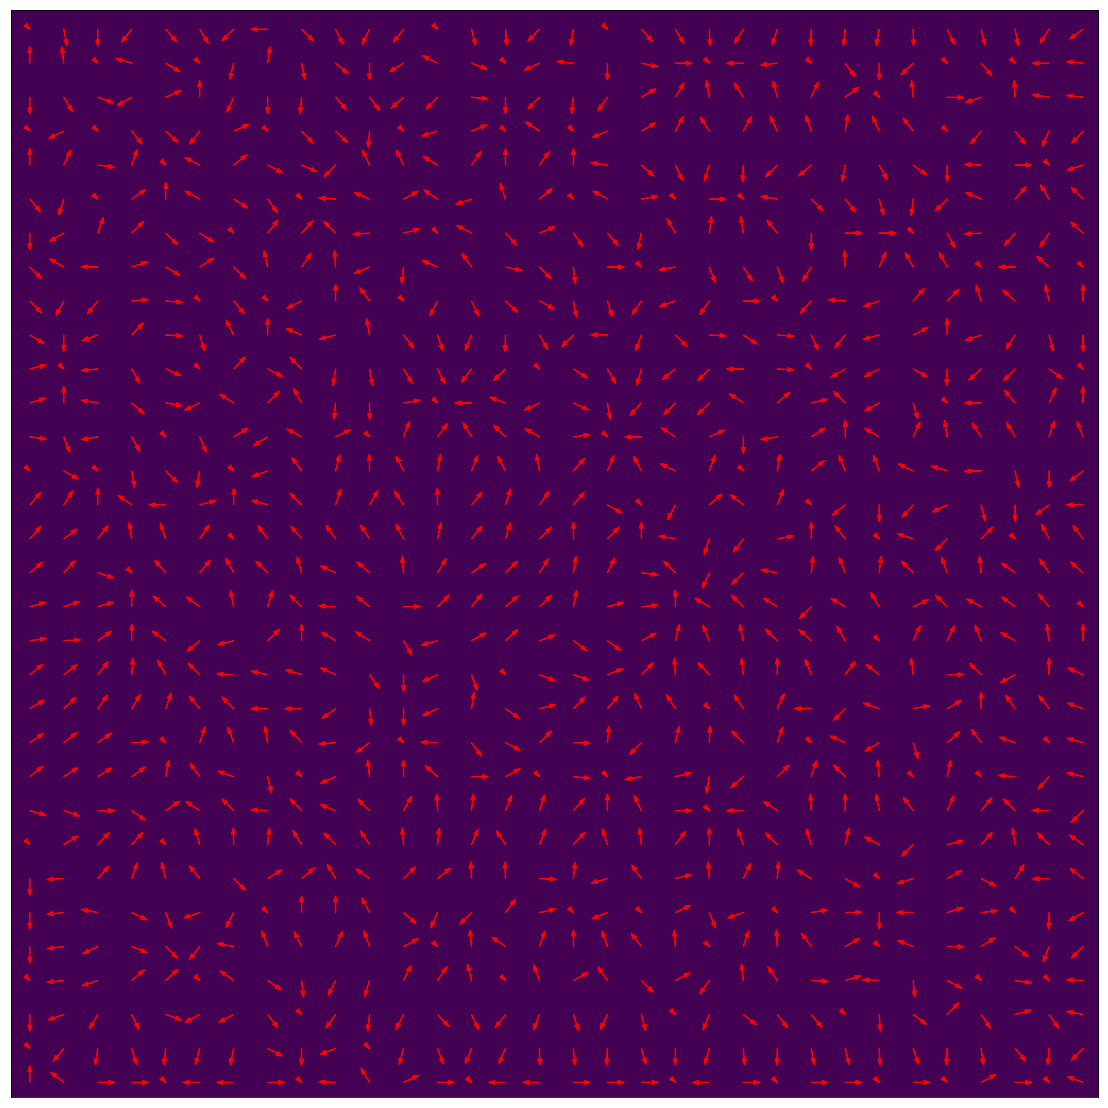

In [186]:
# step 2
num_cells= int(num_cells)

# arrow长度为float(grid_sz)/2
# 输入num_grid*2的矩阵
# flux_mat = gen_rand_vecs(2,num_cells)
# flux_mat = np.zeros(shape=(num_cells,2))
# flux_mat[:,1]=np.sqrt(2)
# flux_mat[:,0]=np.sqrt(2)
# flux_mat = a
flux_mat +=0.0001
# 上：[0,-1]
# 右上：[sqrt(2),-sqrt(2)]
# 右：[1,0]
# 右下：[sqrt(2),sqrt(2)]
#下：[0,1]
# 左下:[-sqrt(2),sqrt(2)]
# 左：[-1,0]
# 左上：[-sqrt(2),-sqrt(2)]

plt.figure(figsize=(20,20))
# plt.imshow(get_img(87))
# plt.imshow(np.zeros(shape=(256,256)))
plt.imshow(np.zeros(shape=(256,256)))
for i in range(num_cells):
    grid_i = ind2ij(i+1,size=256/grid_sz,axis=0)-1
    grid_j = ind2ij(i+1,size=256/grid_sz,axis=1)-1
    cur_center_i = grid_i*grid_sz+grid_sz/2
    cur_center_j = grid_j*grid_sz+grid_sz/2
    
    di = flux_mat[i,0]*float(grid_sz)/2
    dj = flux_mat[i,1]*float(grid_sz)/2
    
#     for grid_sz=8
    plt.arrow(cur_center_i,cur_center_j,di,dj,width=0.1,length_includes_head=True,color='r',head_width=1)
#     plt.text(cur_center_i,cur_center_j,str(i))

#     plt.arrow(cur_center_j,cur_center_i,dj,di,width=0.1,length_includes_head=True,color='r',head_width=1)
#     plt.text(cur_center_j,cur_center_i,str(i))
#      for grid_sz=4
#     plt.arrow(cur_center_i,cur_center_j,di,dj,width=0.1,length_includes_head=True,color='r',head_width=0.5)
    
    

# plt.arrow(8,8,0,grid_sz/2,width=1)
plt.xticks([])
plt.yticks([])

plt.show()




In [180]:
STA_list[677]

0.5156383514404297

In [176]:
STA_list[73]

0.22581225633621216

In [145]:
STA_list[555]

0.5886269807815552

In [165]:
STA_list[556]

1.0

In [147]:
STA_list[557]

0.41649067401885986

In [148]:
STA_list[525]

0.3898333013057709

In [149]:
STA_list[493]

0.38066643476486206

In [150]:
STA_list[492]

0.35027289390563965

In [151]:
STA_list[524]

0.5392280220985413

In [152]:
flux_mat[524]

array([1.e-04, 1.e-04], dtype=float32)

In [94]:
STA_list[48]

0.14216680824756622

In [100]:
STA_list[47]

0.19991806149482727

In [101]:
STA_list[79]

0.2709120512008667

In [105]:
flux_mat[556,:]

array([1.e-04, 1.e-04], dtype=float32)

In [187]:
test_sample_all.shape

(65536, 691)

In [5]:
pseudo_count=1
data_all = test_sample_all
data_all_norm = (data_all+pseudo_count)/(np.percentile(data_all,50,axis=1,keepdims=True)+pseudo_count)
data_all_norm = MinMaxScaler().fit_transform(data_all_norm)

In [ ]:
fg_umap = umap.UMAP(n_components=3,verbose=1).fit_transform(data_all_norm)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=3, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=1)
Construct fuzzy simplicial set


In [8]:
data_all_norm.shape

(65536, 691)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=691)
pca.fit(data_all_norm)

PCA(copy=True, iterated_power='auto', n_components=691, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
pca.explained_variance_ratio_

array([0.16237682, 0.10852176])

In [11]:
info_list=[]
cur_info=0
for i in range(pca.explained_variance_ratio_.shape[0]):
    cur_info += pca.explained_variance_ratio_[i]
    info_list.append(cur_info)

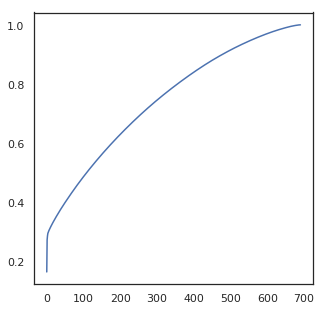

In [22]:
plt.figure(figsize=(5,5))
sns.set(style="white")
sns.lineplot(x=np.arange(len(info_list)),y=info_list)
plt.show()

In [15]:
info_list

[0.16237682001213924,
 0.27089858126373456,
 0.28474571328833287,
 0.29320593003266215,
 0.29665357013905586,
 0.2999794896939636,
 0.30301634377931574,
 0.3057961759900408,
 0.308483757869766,
 0.31102818842477553,
 0.3135605399790353,
 0.31607992535784074,
 0.3185797262030666,
 0.32105624143063144,
 0.323454215365118,
 0.32582333875920827,
 0.32813462350846173,
 0.3304302457918865,
 0.33271074757213426,
 0.3349671174082486,
 0.33718802890361854,
 0.3394018649638353,
 0.3416072311560371,
 0.3437921244202867,
 0.3459558990122689,
 0.3480999463276155,
 0.3502415416820669,
 0.35235518697770524,
 0.35446174151874116,
 0.35655811508807295,
 0.3586484861822605,
 0.36072272148171275,
 0.36278417781562133,
 0.3648397722359249,
 0.3668860051946896,
 0.36891636484124873,
 0.3709375780507988,
 0.3729526538484788,
 0.3749471475891945,
 0.37692890736087203,
 0.37889734112880497,
 0.3808605896236658,
 0.38281595757251924,
 0.38476229251945354,
 0.38669871299366537,
 0.3886230075275891,
 0.390533168